### Introduction
This dataset contains employee information classified into two groups, one group that left and the other that stayed. There is also information on various metrics related to their experience within the company. 

This notebook contains Data wrangling, Exploratory Data Analysis of the data to uncover insights into the turnover.
The main programming language used is Python.
Dataset has been downloaded from https://www.kaggle.com/ludobenistant/hr-analytics


In [1]:
from IPython.display import display, HTML
js ="""<script>
function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>"""

display(HTML(js))

# Data Wrangling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
from matplotlib import font_manager as fm
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [3]:
#load dataset
hr = pd.read_csv('C:\\Users\\dxd4380\\Documents\\personal\\Programming samples\\Python\\1.Data Viz- HR Analytics\\HR_comma_sep.csv')
#hr = pd.DataFrame.from_csv('../1.Data Viz- HR Analytics/HR_comma_sep.csv', index_col=None)

### How many rows and columns in this dataset?

In [4]:
# Initial investigation
sh=hr.shape
print("Number of rows in this dataset is {} and number of columns is {}".format(hr.shape[0],hr.shape[1]))

Number of rows in this dataset is 14999 and number of columns is 10


### How does the data look like?

In [5]:
hr.head()
hr.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


### Column header formatting
Rename columns if needed to make them more understandable by using the rename function

In [6]:
hr = hr.rename(columns={'satisfaction_level': 'Satisfaction_Level', 'last_evaluation': 'Last_Evaluation',
'average_montly_hours': 'Average_Monthly_Hours', 'number_project': 'Number_of_Projects',
'time_spend_company': 'Time_Spend_Company','Work_accident':'Work_Accident','left':'Left','promotion_last_5years':'Promotion_Last_5_Years','sales':'Department','salary':'Salary'})
print(list(hr.columns.values));

['Satisfaction_Level', 'Last_Evaluation', 'Number_of_Projects', 'Average_Monthly_Hours', 'Time_Spend_Company', 'Work_Accident', 'Left', 'Promotion_Last_5_Years', 'Department', 'Salary']


### Is the data Tidy?
Principles of Tidy data

    * Each variable must have its own column.
    All metrics associated with an employee are in their own column
    * Each observation must have its own row.
    Each employee has a separate row
    * Each value must have its own cell.
    Each cell in this dataset represent a single value

### Data Dictionary

### Check for NaN values
There are no NaN values in this dataset

In [7]:
print(hr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
Satisfaction_Level        14999 non-null float64
Last_Evaluation           14999 non-null float64
Number_of_Projects        14999 non-null int64
Average_Monthly_Hours     14999 non-null int64
Time_Spend_Company        14999 non-null int64
Work_Accident             14999 non-null int64
Left                      14999 non-null int64
Promotion_Last_5_Years    14999 non-null int64
Department                14999 non-null object
Salary                    14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### Investigate data values
Investigate unique values and their frequencies to determine blanks, empty strings, unformatted values and strange values that should not be a part of the data

Following output shows the unique values in each column and the frequency at which they appear. 
This gives a quick understanding if there are any values in the dataset that are anomalous

In [8]:
print(hr['Number_of_Projects'].value_counts(dropna=False))
print(hr['Time_Spend_Company'].value_counts(dropna=False))
print(hr['Work_Accident'].value_counts(dropna=False))
print(hr['Left'].value_counts(dropna=False))
print(hr['Department'].value_counts(dropna=False))
print(hr['Salary'].value_counts(dropna=False))


4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: Number_of_Projects, dtype: int64
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: Time_Spend_Company, dtype: int64
0    12830
1     2169
Name: Work_Accident, dtype: int64
0    11428
1     3571
Name: Left, dtype: int64
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64
low       7316
medium    6446
high      1237
Name: Salary, dtype: int64


### View summary statistics to check if columns contain valid values

In [9]:
hr.describe()

,Satisfaction_Level,Last_Evaluation,Number_of_Projects,Average_Monthly_Hours,Time_Spend_Company,Work_Accident,Left,Promotion_Last_5_Years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Classify types of data

### Quantitative:
* <font color='red'>Continuous variables: Satisfaction_Level, Last_Evaluation, Average_Monthly_Hours</font>
Note:In later steps, converted Satisfaction Level into a discrete number by rounding off to the closest decimal 
* <font color='red'>Discrete: Average_Monthly_Hours, Time_Spend_Company, Number_of_Projects</font>

### Qualitative/ Categorical:
* <font color='red'>Binary:Work_Accident, Left, Promotion_Last_5_Years</font>
* <font color='red'>Unordered/Nominal: Department</font>
* <font color='red'>Ordered/Ordinal: Salary</font>


To understand differences between different types of data, please read:


### Check data formats
Use Regex to check if the data formats are correct. "Show code" to see the code snippet.

For Satisfaction Level, the following format is expected 123.23.
If the format is not matched this code will output the list of invalid values

In [10]:
# Create the series 
saisfaction_levels=hr['Satisfaction_Level'].astype(str)

# Drop all the duplicates 
saisfaction_levels  = saisfaction_levels.drop_duplicates()

# Write the regular expression: pattern
pattern = '^\d*\.\d{1,2}$'

# Create the Boolean vector: mask
mask = saisfaction_levels.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset using mask_inverse: invalid
invalid_saisfaction_levels = saisfaction_levels.loc[mask_inverse]

# Print invalid
print(invalid_saisfaction_levels)

Series([], Name: Satisfaction_Level, dtype: object)


Average_Monthly_Hours is expected to be a numeric. If not the following code will output a list of invalid values

In [11]:
monthly_hours=hr['Average_Monthly_Hours'].astype(str)

# Drop all the duplicates 
monthly_hours  = monthly_hours.drop_duplicates()

# Write the regular expression: pattern
pattern = '^\d*$'

# Create the Boolean vector: mask
mask = monthly_hours.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid
invalid_monthly_hours = monthly_hours.loc[mask_inverse]

# Print invalid
print(invalid_monthly_hours)

Series([], Name: Average_Monthly_Hours, dtype: object)


### Column Data Formatting
Ensuring some of the text fields have good formatting for graphs and other analysis purposes

In [12]:
hr['Department']=hr.Department.str.title()
hr.loc[hr.Department == 'Hr', 'Department']= 'HR'
hr.loc[hr.Department == 'It', 'Department']= 'IT'
hr.loc[hr.Department == 'Product_Mng', 'Department']= 'Product Management'
hr.loc[hr.Department == 'Randd', 'Department']= 'R&D'
hr['Salary']=hr.Salary.str.title()
print('Departments after data formatting',hr['Department'].unique())

Departments after data formatting ['Sales' 'Accounting' 'HR' 'Technical' 'Support' 'Management' 'IT'
 'Product Management' 'Marketing' 'R&D']


# Exploratory Data Analysis

### Overall Turnover is 24%

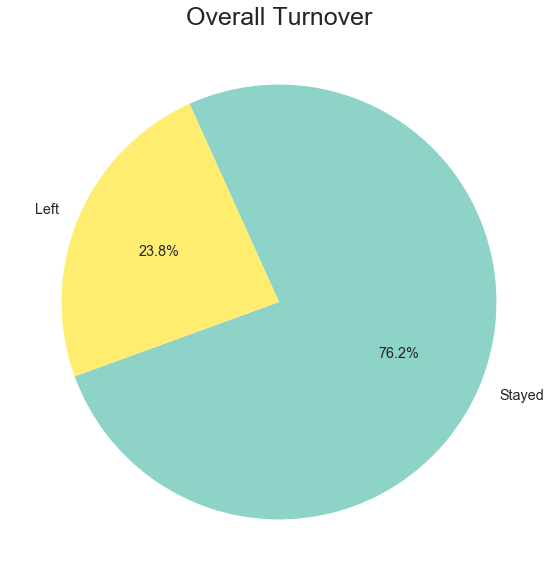

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.title("Overall Turnover", fontsize = 25)

x0, y0, dx, dy = ax1.get_position().bounds
maxd = max(dx, dy)
width =10 * maxd / dx
height = 10 * maxd / dy

fig.set_size_inches((width, height));

dfAll=hr.groupby(['Left']).size().reset_index(name='Num_employees')
cmap = plt.cm.Set3
colors1 = cmap(np.linspace(0., 1., 2))

patches, texts, autotexts = ax1.pie(dfAll['Num_employees'], labels=['Stayed','Left'],autopct='%1.1f%%',colors=colors1,startangle=200);
proptease = fm.FontProperties()
proptease.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease);

### Department-wise Turnover

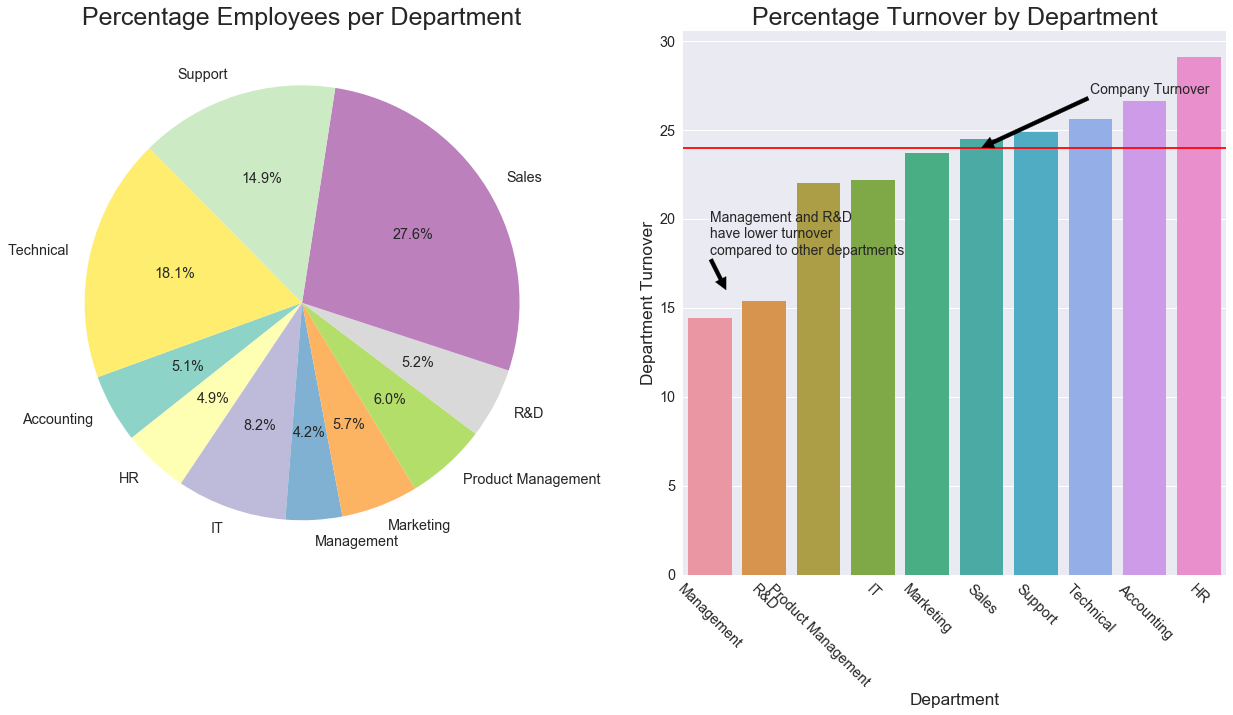

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.title("Percentage Employees per Department", fontsize = 25)
ax2 = fig.add_subplot(122)
plt.title("Percentage Turnover by Department",fontsize=25)
# calculate dimensions of axes 1 in figure units
x0, y0, dx, dy = ax1.get_position().bounds
maxd = max(dx, dy)
width =10 * maxd / dx
height = 10 * maxd / dy

fig.set_size_inches((width, height))

dfAll=hr.groupby(['Department']).size().reset_index(name='Num_employees')
cmap = plt.cm.Set3
colors1 = cmap(np.linspace(0., 1., len(dfAll['Department'])))

patches, texts, autotexts = ax1.pie(dfAll['Num_employees'], labels=dfAll['Department'],autopct='%1.1f%%',colors=colors1,startangle=200);

proptease = fm.FontProperties()
proptease.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

dfdept=hr.groupby(['Department', 'Left']).size().reset_index(name='Num_left')
dfleftdept=dfdept[(dfdept.Left == 1)]
dfleftdeptall=pd.merge(dfAll,dfleftdept, on='Department')

dfleftdeptall['Dept_Turnover'] = dfleftdeptall.apply(lambda row: round(row['Num_left']/row['Num_employees']*100,1),axis=1)
#dfleftdeptall.convert_objects(convert_numeric=True).sort(['Dept_Turnover'], ascending=[True])
dfleftdeptall=dfleftdeptall.sort_values(by='Dept_Turnover')
#print(dfleftdeptall)
g=sns.factorplot(x="Department", y="Dept_Turnover", data=dfleftdeptall, kind="bar",ax=ax2)
#Always keep this after g

plt.close(g.fig);

plt.xlabel("Department",size='xx-large')
plt.ylabel("Department Turnover",size='xx-large')
plt.xticks(rotation=-45,size='x-large')
plt.yticks(size='x-large')

ax2.axhline(y=24, color='r', linestyle='-')
ax2.annotate('Company Turnover', xy=(5, 24),xytext=(7,27),
          arrowprops=dict(facecolor='black'),size=14)
annotate_string=r"Management and R&D"
annotate_string+="\n"
annotate_string+=r"have lower turnover"
annotate_string+="\n"
annotate_string+=r"compared to other departments"
ax2.annotate(annotate_string, xy=(0.3, 16),xytext=(0,18),
          arrowprops=dict(facecolor='black'),size=14)

plt.show()


### Salary Analysis

### Turnover by Salary Category

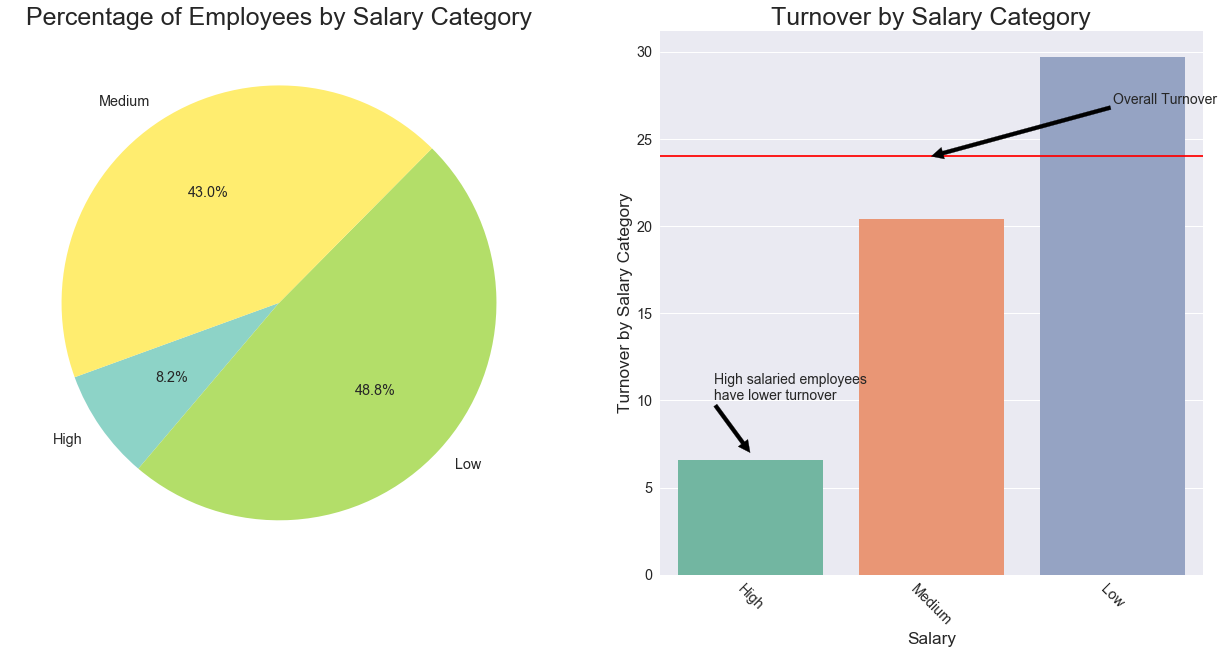

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.title("Percentage of Employees by Salary Category", fontsize = 25)
ax2 = fig.add_subplot(122)
plt.title("Turnover by Salary Category",fontsize=25)
# calculate dimensions of axes 1 in figure units
x0, y0, dx, dy = ax1.get_position().bounds
maxd = max(dx, dy)
width =10 * maxd / dx
height = 10 * maxd / dy

fig.set_size_inches((width, height))

dfAll=hr.groupby(['Salary']).size().reset_index(name='Num_employees')
cmap = plt.cm.Set3
colors1 = cmap(np.linspace(0., 1., len(dfAll['Salary'])))

patches, texts, autotexts = ax1.pie(dfAll['Num_employees'], labels=dfAll['Salary'],autopct='%1.1f%%',colors=colors1,startangle=200);

proptease = fm.FontProperties()
proptease.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

dfdept=hr.groupby(['Salary', 'Left']).size().reset_index(name='Num_left')
dfleftdept=dfdept[(dfdept.Left == 1)]
dfleftdeptall=pd.merge(dfAll,dfleftdept, on='Salary')

dfleftdeptall['Dept_Turnover'] = dfleftdeptall.apply(lambda row: round(row['Num_left']/row['Num_employees']*100,1),axis=1)
dfleftdeptall=dfleftdeptall.sort_values(by='Dept_Turnover')
g=sns.factorplot(x="Salary", y="Dept_Turnover", data=dfleftdeptall, kind="bar",palette="Set2",ax=ax2)
#Always keep this after g

plt.close(g.fig);

plt.xlabel("Salary",size='xx-large')
plt.ylabel("% Turnover by Salary Category",size='xx-large')
plt.xticks(rotation=-45,size='x-large')
plt.yticks(size='x-large')

ax2.axhline(y=24, color='r', linestyle='-')
ax2.annotate('Company Turnover', xy=(1, 24),xytext=(2,27),
          arrowprops=dict(facecolor='black'),size=14
           )
annotate_string=r"High salaried employees"
annotate_string+="\n"
annotate_string+=r"have lower turnover"
ax2.annotate(annotate_string, xy=(0, 7),xytext=(-0.2,10),
          arrowprops=dict(facecolor='black'),size=14)
plt.show()

### Turnover based on Tenure

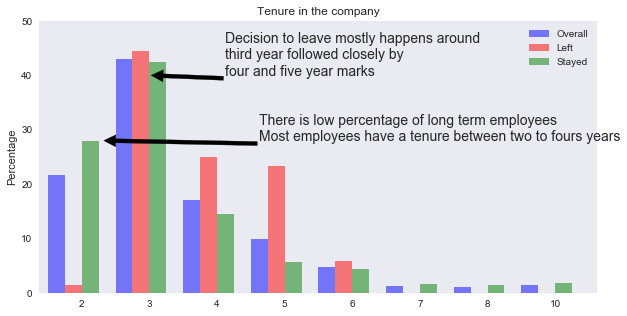

In [77]:
df1=hr.groupby(['Time_Spend_Company']).size().reset_index(name='Num_left');
df1['Overall']= df1['Num_left']*100/df1['Num_left'].sum()

df2=hr.groupby(['Time_Spend_Company', 'Left']).size().reset_index(name='Num_left');
dfleft=df2[(df2.Left == 1)];
dfleft['Left perc']= dfleft['Num_left']*100/dfleft['Num_left'].sum();
del dfleft['Left']
del dfleft['Num_left']

dfstayed=df2[(df2.Left == 0)];
dfstayed['Stayed perc']= dfstayed['Num_left']*100/dfstayed['Num_left'].sum();
del dfstayed['Left']
del dfstayed['Num_left']

df_new=pd.merge(df1,dfleft,how='left',on='Time_Spend_Company')
df_final=pd.merge(df_new,dfstayed,how='left',on='Time_Spend_Company')
del df_final['Num_left']


# Setting the positions and width for the bars
pos = list(range(len(df_final['Time_Spend_Company']))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df_final['Overall'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='blue', 
        # with label the first value in first_name
        label=df_final['Time_Spend_Company']) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df_final['Left perc'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='red', 
        # with label the second value in first_name
        label=df_final['Time_Spend_Company']) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        df_final['Stayed perc'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='green', 
        # with label the third value in first_name
        label=df_final['Time_Spend_Company']) 

# Set the y axis label
ax.set_ylabel('Percentage')

# Set the chart's title
ax.set_title('Tenure in the company')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_final['Time_Spend_Company'])

annotate_string=r"Decision to leave mostly happens around"
annotate_string+="\n"
annotate_string+=r"third year followed closely by"
annotate_string+="\n"
annotate_string+=r"four and five year marks"
ax.annotate(annotate_string, xy=(1.4,40),xytext=(2.5,40),
          arrowprops=dict(facecolor='black'),size=14)
annotate_string=r"There is low percentage of long term employees"
annotate_string+="\n"
annotate_string+=r"Most employees have a tenure between two to fours years"

ax.annotate(annotate_string, xy=(0.7,28),xytext=(3,28),
          arrowprops=dict(facecolor='black'),size=14)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0,50])

# Adding the legend and showing the plot
plt.legend(['Overall', 'Left', 'Stayed'], loc='upper right')
plt.grid()
plt.show()

### Employees Promoted in the last 5 years


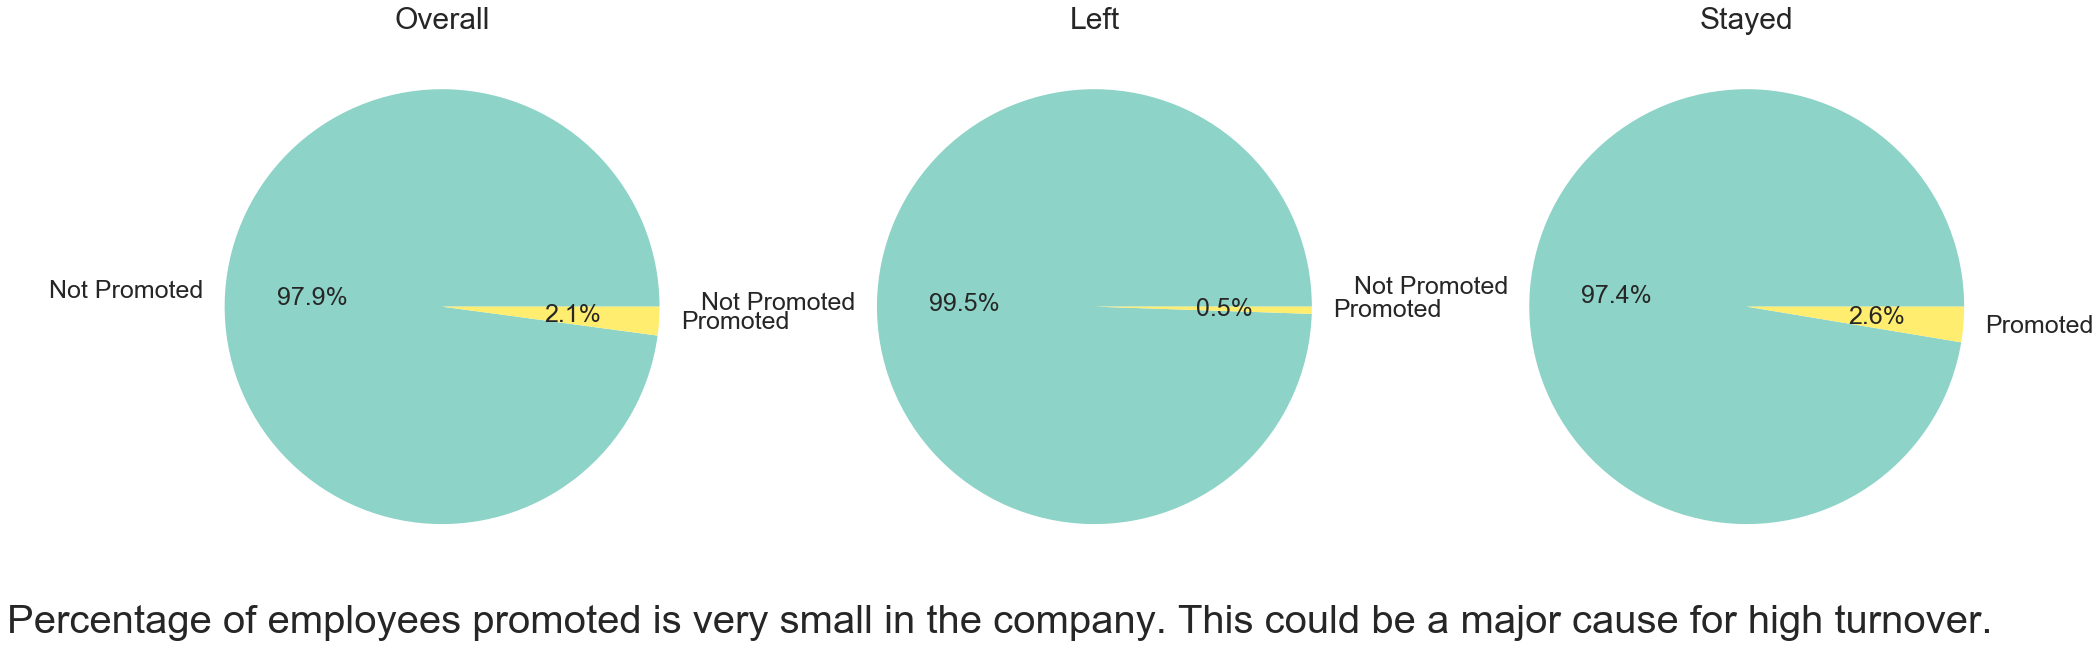

In [18]:
fig = plt.figure();
ax1 = fig.add_subplot(131);
plt.title("Overall", fontsize = 30);
ax2 = fig.add_subplot(132);
plt.title("Left",fontsize=30);
ax3 = fig.add_subplot(133);
plt.title("Stayed",fontsize=30);
# calculate dimensions of axes 1 in figure units
ax1.text(-2,-1.5,'Percentage of employees promoted is very small in the company. This could be a major cause for high turnover.',fontsize=40)
x0, y0, dx, dy = ax1.get_position().bounds;
maxd = max(dx, dy);
width =10 * maxd / dx;
height = 10 * maxd / dy;
fig.set_size_inches((width, height));
dfprom1=hr.groupby(['Promotion_Last_5_Years']).size().reset_index(name='Num_left');
cmap = plt.cm.Set3;
colors1 = cmap(np.linspace(0., 1., 2));
patches, texts, autotexts = ax1.pie(dfprom1['Num_left'], labels=['Not Promoted','Promoted'],autopct='%1.1f%%',colors=colors1);

proptease = fm.FontProperties();
proptease.set_size(25);
plt.setp(autotexts, fontproperties=proptease);
plt.setp(texts, fontproperties=proptease);

dfprom=hr.groupby(['Promotion_Last_5_Years', 'Left']).size().reset_index(name='Num_left');
dfleftprom=dfprom[(dfprom.Left == 1)];
dfstayedprom=dfprom[(dfprom.Left == 0)];
patches, texts, autotexts = ax2.pie(dfleftprom['Num_left'], labels=['Not Promoted','Promoted'],autopct='%1.1f%%',colors=colors1);

proptease = fm.FontProperties();
proptease.set_size(25);
plt.setp(autotexts, fontproperties=proptease);
plt.setp(texts, fontproperties=proptease)

patches, texts, autotexts = ax3.pie(dfstayedprom['Num_left'], labels=['Not Promoted','Promoted'],autopct='%1.1f%%',colors=colors1);

proptease = fm.FontProperties();
proptease.set_size(25);
plt.setp(autotexts, fontproperties=proptease);
plt.setp(texts, fontproperties=proptease);


### Satisfaction Level

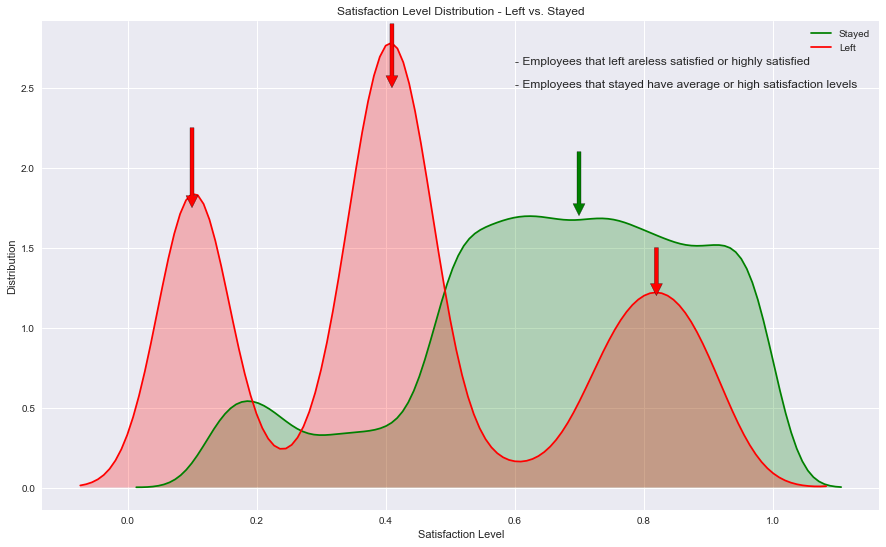

In [56]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,9),);
av_satisfaction=hr['Left'].mean();
ax=sns.kdeplot(hr.loc[(hr['Left'] == 0),'Satisfaction_Level'] , color='g',shade=True,label='Stayed');
ax=sns.kdeplot(hr.loc[(hr['Left'] == 1),'Satisfaction_Level'] , color='r',shade=True, label='Left');
ax.set(xlabel='Satisfaction Level', ylabel='Distribution');

plt.title('Satisfaction Level Distribution - Left vs. Stayed');
annotate_string=r"- Employees that left are"
annotate_string+=r"less satisfied or highly satisfied"
annotate_string+="\n\n"
annotate_string+='- Employees that stayed have average or high satisfaction levels'
ax.text(0.6,2.5,annotate_string,fontsize=12)
ax.annotate('', xy=(0.1, 1.75),xytext=(0.1,2.25),
         arrowprops=dict(facecolor='red'),size=14)
ax.annotate('', xy=(0.41, 2.5),xytext=(0.41,2.9),
         arrowprops=dict(facecolor='red'),size=14)
ax.annotate('', xy=(0.82, 1.2),xytext=(0.82,1.5),
        arrowprops=dict(facecolor='red'),size=14)
ax.annotate('', xy=(0.7,1.7),xytext=(0.7,2.1),
         arrowprops=dict(facecolor='green'),size=14)



### Job Performance

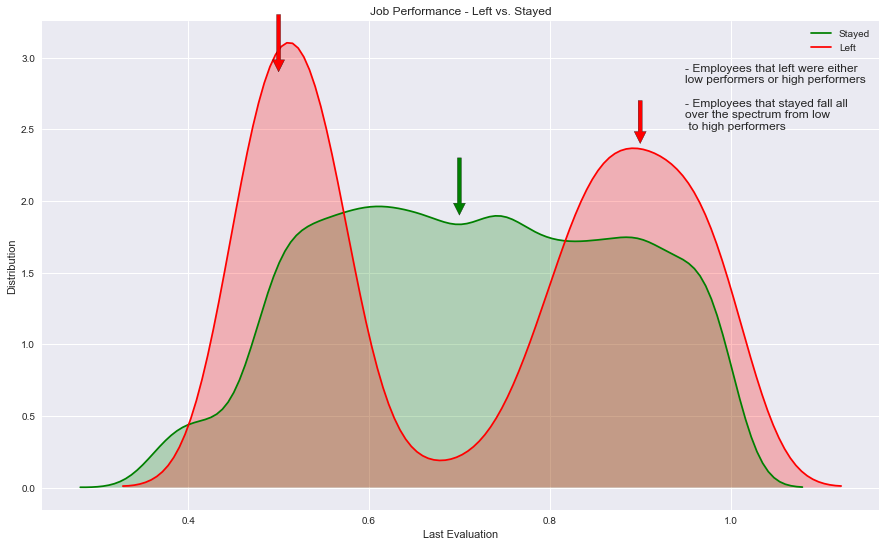

In [55]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,9),);

ax=sns.kdeplot(hr.loc[(hr['Left'] == 0),'Last_Evaluation'] , color='g',shade=True,label='Stayed');
ax=sns.kdeplot(hr.loc[(hr['Left'] == 1),'Last_Evaluation'] , color='r',shade=True, label='Left');
ax.set(xlabel='Last Evaluation', ylabel='Distribution');

plt.title('Job Performance - Left vs. Stayed');
annotate_string=r"- Employees that left were either"
annotate_string+="\n"
annotate_string+="low performers or high performers"
annotate_string+="\n\n"
annotate_string+="- Employees that stayed fall all"
annotate_string+="\n"
annotate_string+="over the spectrum from low"
annotate_string+="\n"
annotate_string+=" to high performers"
ax.text(0.95,2.5,annotate_string,fontsize=12)
ax.annotate('', xy=(0.5,2.9),xytext=(0.5,3.3),
          arrowprops=dict(facecolor='red'),size=14)

ax.annotate('', xy=(0.9, 2.4),xytext=(0.9,2.7),
          arrowprops=dict(facecolor='red'),size=14)

ax.annotate('', xy=(0.7,1.9),xytext=(0.7,2.3),
          arrowprops=dict(facecolor='green'),size=14)

### Average Monthly Working Hours

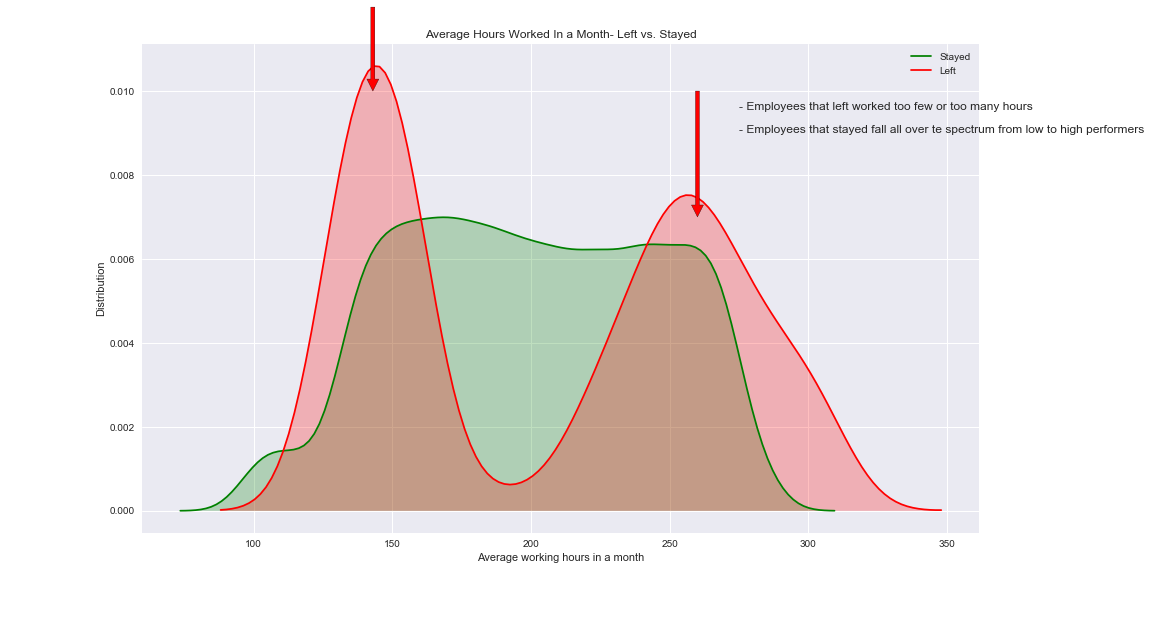

In [71]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,9),);
ax=sns.kdeplot(hr.loc[(hr['Left'] == 0),'Average_Monthly_Hours'] , color='g',shade=True,label='Stayed');
ax=sns.kdeplot(hr.loc[(hr['Left'] == 1),'Average_Monthly_Hours'] , color='r',shade=True, label='Left');
ax.set(xlabel='Average working hours in a month', ylabel='Distribution');
plt.title('Average Hours Worked In a Month- Left vs. Stayed');
annotate_string=r"- Employees that left worked too few or too many hours"
annotate_string+="\n\n"
annotate_string+=r"- Employees that stayed fall all over te spectrum from low to high performers"

ax.text(275,0.009,annotate_string,fontsize=12)
ax.annotate('', xy=(143, 0.01),xytext=(143,0.012),
          arrowprops=dict(facecolor='red'),size=14)

ax.annotate('', xy=(260, 0.007),xytext=(260,0.01),
          arrowprops=dict(facecolor='red'),size=14)

ax.annotate(annotate_string, xy=(0.7,1.9),xytext=(0.7,2.3),
          arrowprops=dict(facecolor='green'),size=14)



### Number of Projects

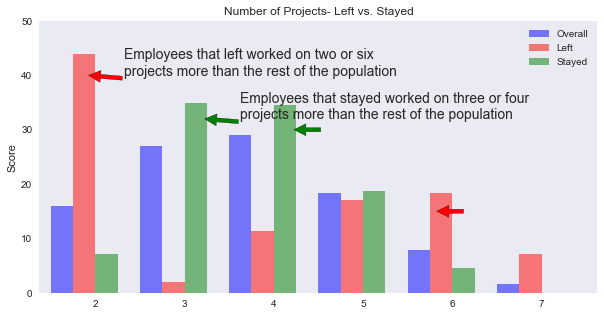

In [76]:
df1=hr.groupby(['Number_of_Projects']).size().reset_index(name='Num_left');
df1['Overall']= df1['Num_left']*100/df1['Num_left'].sum()

df2=hr.groupby(['Number_of_Projects', 'Left']).size().reset_index(name='Num_left');
dfleft=df2[(df2.Left == 1)];
dfleft['Left perc']= dfleft['Num_left']*100/dfleft['Num_left'].sum();
del dfleft['Left']
del dfleft['Num_left']

dfstayed=df2[(df2.Left == 0)];
dfstayed['Stayed perc']= dfstayed['Num_left']*100/dfstayed['Num_left'].sum();
del dfstayed['Left']
del dfstayed['Num_left']

df_new=pd.merge(df1,dfleft,how='left',on='Number_of_Projects')
df_final=pd.merge(df_new,dfstayed,how='left',on='Number_of_Projects')
del df_final['Num_left']

# Setting the positions and width for the bars
pos = list(range(len(df_final['Number_of_Projects']))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df_final['Overall'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='blue', 
        # with label the first value in first_name
        label=df_final['Number_of_Projects']) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df_final['Left perc'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='red', 
        # with label the second value in first_name
        label=df_final['Number_of_Projects']) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        df_final['Stayed perc'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='green', 
        # with label the third value in first_name
        label=df_final['Number_of_Projects']) 

# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Number of Projects- Left vs. Stayed')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_final['Number_of_Projects'])

annotate_string=r"Employees that left worked on two or six"
annotate_string+="\n"
annotate_string+="projects more than the rest of the population "
ax.annotate(annotate_string, xy=(0.3, 40),xytext=(0.7,40),
          arrowprops=dict(facecolor='red'),size=14)
ax.annotate('', xy=(4.2, 15),xytext=(4.5,15),
          arrowprops=dict(facecolor='red'),size=14)

annotate_string=r"Employees that stayed worked on three or four"
annotate_string+="\n"
annotate_string+="projects more than the rest of the population "
ax.annotate(annotate_string, xy=(1.6, 32),xytext=(2,32),
          arrowprops=dict(facecolor='green'),size=14)
ax.annotate('', xy=(2.6, 30),xytext=(2.9,30),
          arrowprops=dict(facecolor='green'),size=14)
# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0,50])

# Adding the legend and showing the plot
plt.legend(['Overall', 'Left', 'Stayed'], loc='upper right')
plt.grid()
plt.show()



### Work Accidents

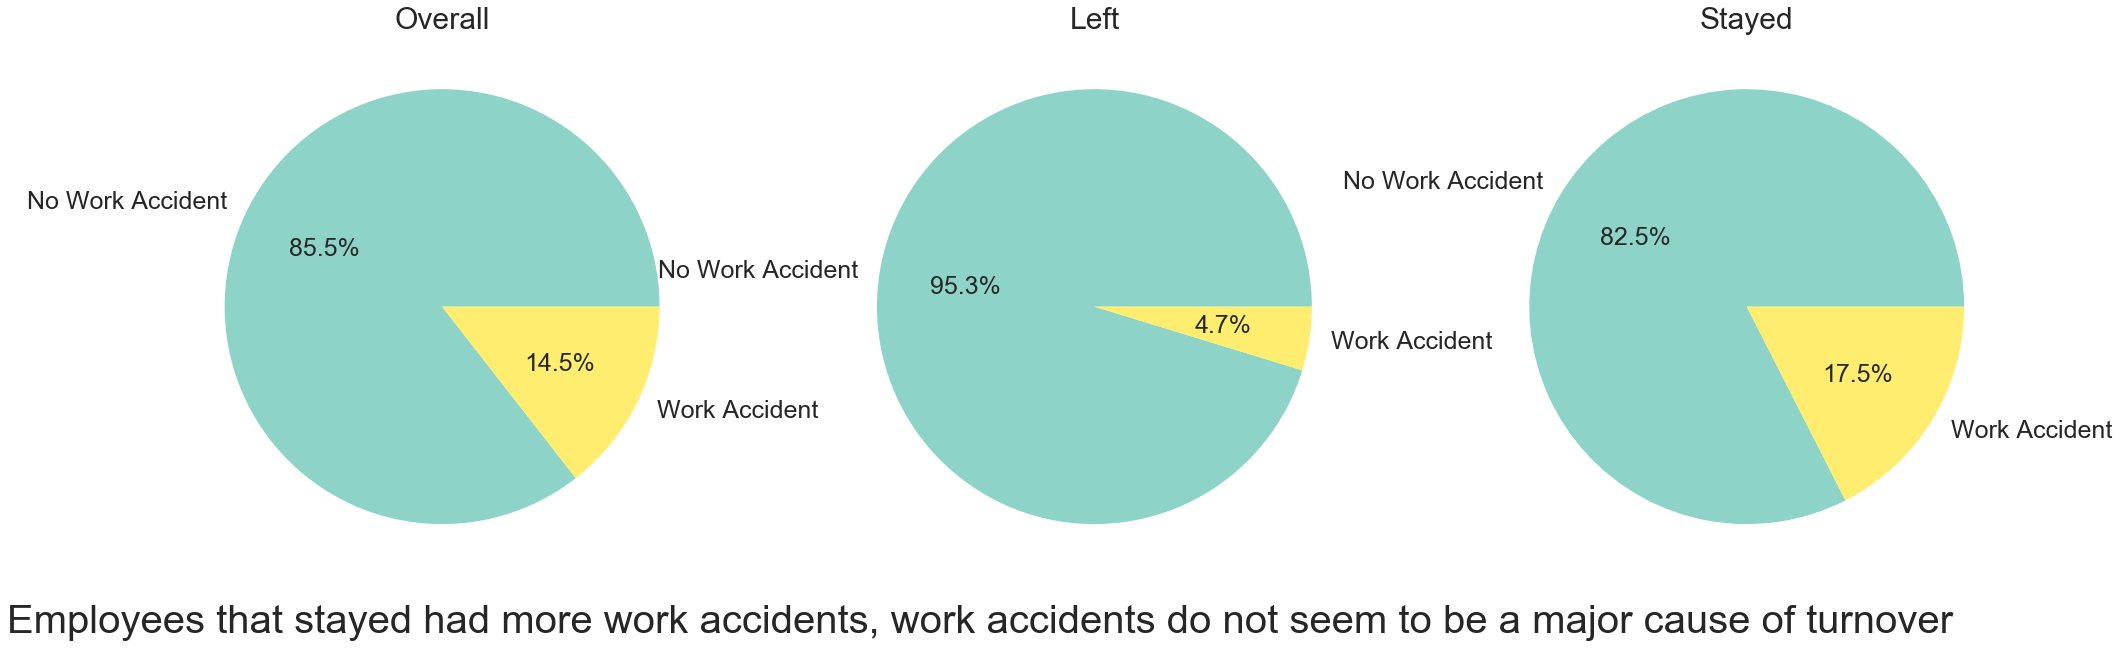

In [72]:
fig = plt.figure();
ax1 = fig.add_subplot(131);
plt.title("Overall", fontsize = 30);
ax2 = fig.add_subplot(132);
plt.title("Left",fontsize=30);
ax3 = fig.add_subplot(133);
plt.title("Stayed",fontsize=30);
# calculate dimensions of axes 1 in figure units
ax1.text(-2,-1.5,'Employees that stayed had more work accidents, work accidents do not seem to be a major cause of turnover',fontsize=40)
x0, y0, dx, dy = ax1.get_position().bounds;
maxd = max(dx, dy);
width =10 * maxd / dx;
height = 10 * maxd / dy;
fig.set_size_inches((width, height));
dfprom1=hr.groupby(['Work_Accident']).size().reset_index(name='Num_left');
cmap = plt.cm.Set3;
colors1 = cmap(np.linspace(0., 1., 2));
patches, texts, autotexts = ax1.pie(dfprom1['Num_left'], labels=['No Work Accident','Work Accident'],autopct='%1.1f%%',colors=colors1);

proptease = fm.FontProperties();
proptease.set_size(25);
plt.setp(autotexts, fontproperties=proptease);
plt.setp(texts, fontproperties=proptease);

dfprom=hr.groupby(['Work_Accident', 'Left']).size().reset_index(name='Num_left');
dfleftprom=dfprom[(dfprom.Left == 1)];
dfstayedprom=dfprom[(dfprom.Left == 0)];
patches, texts, autotexts = ax2.pie(dfleftprom['Num_left'], labels=['No Work Accident','Work Accident'],autopct='%1.1f%%',colors=colors1);

proptease = fm.FontProperties();
proptease.set_size(25);
plt.setp(autotexts, fontproperties=proptease);
plt.setp(texts, fontproperties=proptease)

patches, texts, autotexts = ax3.pie(dfstayedprom['Num_left'], labels=['No Work Accident','Work Accident'],autopct='%1.1f%%',colors=colors1);

proptease = fm.FontProperties();
proptease.set_size(25);
plt.setp(autotexts, fontproperties=proptease);
plt.setp(texts, fontproperties=proptease);

Consulted Resources:
    http://blog.minitab.com/blog/understanding-statistics/understanding-qualitative-quantitative-attribute-discrete-and-continuous-data-types